In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/veremi_results"
os.makedirs(drive_path, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json from your Kaggle account settings


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shilpasayura","key":"e374917f1d4f4c2253f591c243608267"}'}

In [ ]:
import shutil
import os

os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets download -d shilpasayura/veremi-ex-subsets


Dataset URL: https://www.kaggle.com/datasets/shilpasayura/veremi-ex-subsets
License(s): CC0-1.0
 64% 27.0M/42.0M [00:00<00:00, 266MB/s]
100% 42.0M/42.0M [00:00<00:00, 285MB/s]


In [ ]:
!unzip -q veremi-ex-subsets.zip -d veremi-ex-subsets


In [ ]:
import pandas as pd

df = pd.read_csv('/content/veremi-ex-subsets/veremi_subset_20000.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          20000 non-null  int64  
 1   sendTime      20000 non-null  float64
 2   sender        20000 non-null  int64  
 3   senderPseudo  20000 non-null  int64  
 4   messageID     20000 non-null  int64  
 5   class         20000 non-null  int64  
 6   posx          20000 non-null  float64
 7   posy          20000 non-null  float64
 8   posz          20000 non-null  float64
 9   spdx          20000 non-null  float64
 10  spdy          20000 non-null  float64
 11  spdz          20000 non-null  float64
 12  aclx          20000 non-null  float64
 13  acly          20000 non-null  float64
 14  aclz          20000 non-null  float64
 15  hedx          20000 non-null  float64
 16  hedy          20000 non-null  float64
 17  hedz          20000 non-null  float64
 18  frame_id      20000 non-nu

,type,sendTime,sender,senderPseudo,messageID,class,posx,posy,posz,spdx,...,aclx,acly,aclz,hedx,hedy,hedz,frame_id,Attack,Attack_type,binary_label
0,4,240.602763,9,1092,4184,0,265.105411,50.751262,0.0,-0.106863,...,-0.252108,2.440102,0.0,-0.093026,0.995664,0.0,0,Normal,Normal behavior,0
1,4,241.602763,9,1092,4194,0,264.959604,53.058156,0.0,-0.335474,...,-0.173838,1.682665,0.0,-0.093026,0.995664,0.0,1,Normal,Normal behavior,0
2,4,242.602763,9,1092,4204,0,264.331427,57.302385,0.0,-0.604297,...,-0.301984,2.660974,0.0,-0.098425,0.995144,0.0,2,Normal,Normal behavior,0
3,4,243.602763,9,1092,4214,0,263.610633,63.710039,0.0,-0.999298,...,-0.196967,1.416335,0.0,-0.122430,0.992477,0.0,3,Normal,Normal behavior,0
4,4,244.602763,9,1092,4224,0,262.621917,71.941010,0.0,-1.409192,...,-0.291180,1.881746,0.0,-0.137632,0.990483,0.0,4,Normal,Normal behavior,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4,17798.463930,1875,1,1899191,16,264.872046,413.990777,0.0,0.001249,...,0.001278,0.001278,0.0,-0.956000,-0.293368,0.0,19995,Attack,DoS random sybil,1
19996,4,17798.630596,1875,1,1899218,16,278.617982,413.393738,0.0,0.001215,...,0.001278,0.001278,0.0,-0.954246,-0.299024,0.0,19996,Attack,DoS random sybil,1
19997,4,17798.797263,1875,1018751,1899221,16,238.706930,399.386455,0.0,0.000035,...,0.000003,0.000003,0.0,-0.974491,-0.224426,0.0,19997,Attack,DoS random sybil,1
19998,4,17798.963930,1875,1,1899251,16,255.168655,405.678325,0.0,0.001293,...,0.001278,0.001278,0.0,-0.954311,-0.298817,0.0,19998,Attack,DoS random sybil,1


In [ ]:
# STEP 1: Install TensorFlow (only once)
!pip install tensorflow


In [ ]:
# STEP 2: Imports
import pandas as pd
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# STEP 3: Load or Initialize Results DataFrame
try:
    results_df = pd.read_csv("/content/lstm_test_results.csv")
    print("Loaded previous results")
except FileNotFoundError:
    results_df = pd.DataFrame(columns=[
        'Timestamp', 'Model', 'Dataset', 'Sample Size', 'Training Time (s)', 'Best Epoch','Accuracy', 'Precision', 'Recall', 'F1 Score',
        'Confusion Matrix', 'CPU Usage (%)', 'Memory Usage (MB)', 'Model Size (MB)', 'Inference Time (s)'
    ])
    print("Created new results table")

Created new results table


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_veremi_subset(file_path, save_path):
    # Define columns to retain
    keep_columns = [
        'frame_id', 'sendTime',
        'posx', 'posy', 'posz',
        'spdx', 'spdy', 'spdz',
        'aclx', 'acly', 'aclz',
        'hedx', 'hedy', 'hedz',
        'binary_label'
    ]

    # Load data
    df = pd.read_csv(file_path)

    # Drop non-numeric columns (e.g., 'Attack', 'Attack_type') and enforce keep order
    df = df.select_dtypes(include=['int64', 'float64'])
    df = df[[col for col in keep_columns if col in df.columns]]

    # Sort by sendTime and reassign frame_id
    df = df.sort_values(by='sendTime').reset_index(drop=True)
    df['frame_id'] = df.index

    # Columns to normalize (excluding binary_label and frame_id)
    features_to_normalize = [
        'sendTime',
        'posx', 'posy', 'posz',
        'spdx', 'spdy', 'spdz',
        'aclx', 'acly', 'aclz',
        'hedx', 'hedy', 'hedz'
    ]

    # Normalize
    scaler = StandardScaler()
    df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
    print(df.columns)
    # Save cleaned & normalized file
    df.to_csv(save_path, index=False)
    print("Saved cleaned file: {save_path}")



In [ ]:
subset_sizes = [20000, 40000, 80000, 120000, 160000, 200000]

for size in subset_sizes:
    input_file = f"/content/veremi-ex-subsets/veremi_subset_{size}.csv"
    output_file = f"veremi_subset_{size}_normalized.csv"
    preprocess_veremi_subset(input_file, output_file)

Index(['frame_id', 'sendTime', 'posx', 'posy', 'posz', 'spdx', 'spdy', 'spdz',
       'aclx', 'acly', 'aclz', 'hedx', 'hedy', 'hedz', 'binary_label'],
      dtype='object')
Saved cleaned file: {save_path}
Index(['frame_id', 'sendTime', 'posx', 'posy', 'posz', 'spdx', 'spdy', 'spdz',
       'aclx', 'acly', 'aclz', 'hedx', 'hedy', 'hedz', 'binary_label'],
      dtype='object')
Saved cleaned file: {save_path}
Index(['frame_id', 'sendTime', 'posx', 'posy', 'posz', 'spdx', 'spdy', 'spdz',
       'aclx', 'acly', 'aclz', 'hedx', 'hedy', 'hedz', 'binary_label'],
      dtype='object')
Saved cleaned file: {save_path}
Index(['frame_id', 'sendTime', 'posx', 'posy', 'posz', 'spdx', 'spdy', 'spdz',
       'aclx', 'acly', 'aclz', 'hedx', 'hedy', 'hedz', 'binary_label'],
      dtype='object')
Saved cleaned file: {save_path}
Index(['frame_id', 'sendTime', 'posx', 'posy', 'posz', 'spdx', 'spdy', 'spdz',
       'aclx', 'acly', 'aclz', 'hedx', 'hedy', 'hedz', 'binary_label'],
      dtype='object')
Saved c

Sequence Generation	X_seq = ... loop from above	Create fixed-length [samples, time_steps, features] sequences

Visualization	plt.plot(df['frame_id'], ...)	Plot label distribution over frame_id

Error Logging	misclassified_frames.csv	Save wrongly predicted frame IDs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import os

def process_veremi_sequence_safe(size=20000, sequence_length=5):
    path = f"/content/veremi_subset_{size}_normalized.csv"
    if not os.path.exists(path):
        print(f"[ERROR] File not found: {path}")
        return

    print(f"[INFO] Processing dataset of size {size}")
    df = pd.read_csv(path)
    df = df.sort_values(by='frame_id').reset_index(drop=True)

    # Feature selection
    features = df.columns.difference(['binary_label', 'frame_id']).tolist()
    total_samples = len(df) - sequence_length

    print(f"[INFO] Generating {total_samples} sequences...")

    # Preallocate memory
    X_seq = np.empty((total_samples, sequence_length, len(features)), dtype=np.float32)
    y_seq = np.empty((total_samples,), dtype=np.int32)
    frame_ids = np.empty((total_samples,), dtype=np.int32)

    for i in range(total_samples):
        X_seq[i] = df[features].iloc[i:i+sequence_length].values
        y_seq[i] = df['binary_label'].iloc[i+sequence_length - 1]
        frame_ids[i] = df['frame_id'].iloc[i+sequence_length - 1]

    # Save output arrays
    np.save(f"/content/X_seq_{size}.npy", X_seq)
    np.save(f"/content/y_seq_{size}.npy", y_seq)

    # Plot label distribution (small footprint)
    plt.figure(figsize=(10, 3))
    plt.plot(df['frame_id'], df['binary_label'], linestyle='-', marker='.', markersize=2)
    plt.title(f"Label Distribution for {size} Samples")
    plt.xlabel("Frame ID")
    plt.ylabel("Binary Label")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/content/label_dist_{size}.png")
    plt.show()
    plt.close('all')

    # Dummy predictions (zeros) → misclassification
    y_pred = np.zeros_like(y_seq)
    mismatch = y_seq != y_pred

    # Save misclassified only if < 10K to avoid memory crash
    if mismatch.sum() < 10000:
        mis_df = pd.DataFrame({
            'frame_id': frame_ids[mismatch],
            'true_label': y_seq[mismatch],
            'predicted_label': y_pred[mismatch]
        })
        mis_df.to_csv(f"/content/misclassified_{size}.csv", index=False)
        print(f"[INFO] Saved {len(mis_df)} misclassified frames.")
    else:
        print(f"[WARNING] Too many misclassifications; skipping save.")

    # Cleanup
    del df, X_seq, y_seq, frame_ids
    gc.collect()




Memory usage: 13.3%
[INFO] Processing dataset of size 20000
[INFO] Generating 19995 sequences...


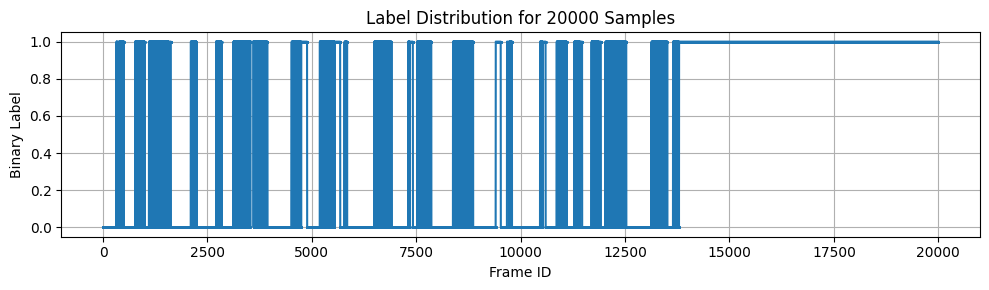

[INFO] Saved 9999 misclassified frames.
Memory usage: 13.5%


In [ ]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")
#  Call only one at a time
process_veremi_sequence_safe(20000)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 13.5%
[INFO] Processing dataset of size 40000
[INFO] Generating 39995 sequences...


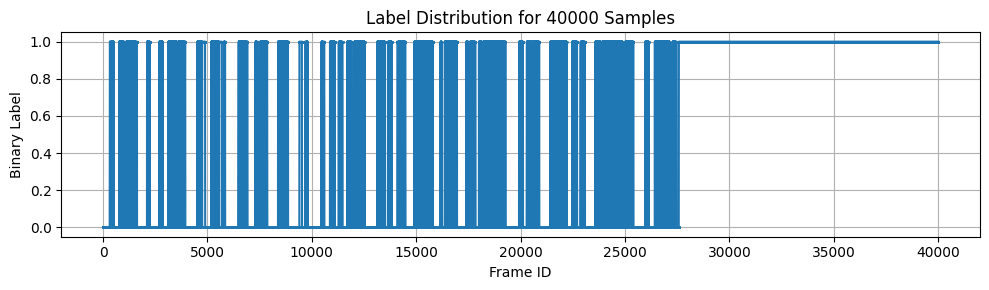

[WARNING] Too many misclassifications; skipping save.
Memory usage: 13.5%


In [ ]:
#import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")
#  Call only one at a time
process_veremi_sequence_safe(40000)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 13.5%
[INFO] Processing dataset of size 80000
[INFO] Generating 79995 sequences...


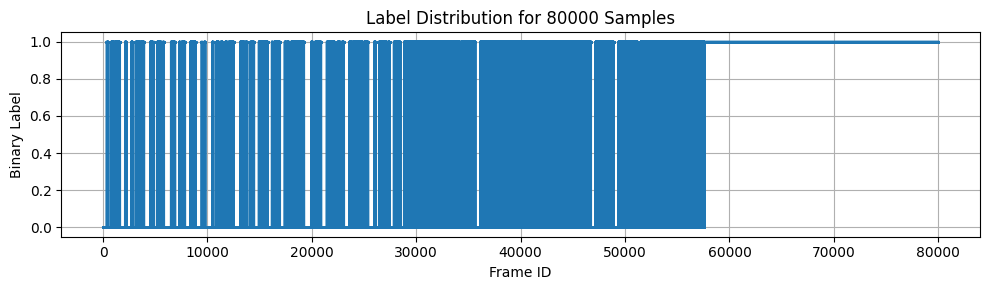

[WARNING] Too many misclassifications; skipping save.
Memory usage: 12.8%


In [ ]:
#import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")
#  Call only one at a time
process_veremi_sequence_safe(80000)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 12.8%
[INFO] Processing dataset of size 120000
[INFO] Generating 119995 sequences...


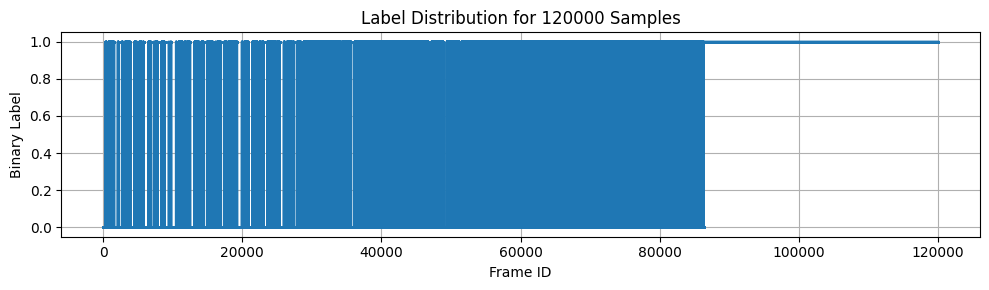

[WARNING] Too many misclassifications; skipping save.
Memory usage: 13.0%


In [ ]:
#import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")
#  Call only one at a time
process_veremi_sequence_safe(120000)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 13.0%
[INFO] Processing dataset of size 160000
[INFO] Generating 159995 sequences...


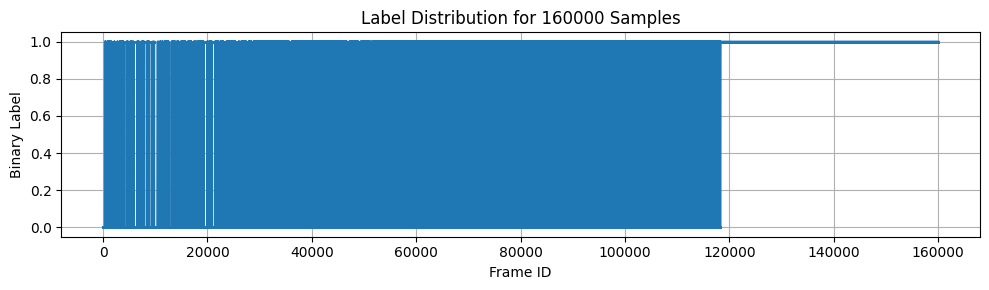

[WARNING] Too many misclassifications; skipping save.
Memory usage: 13.1%


In [ ]:
#import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")
#  Call only one at a time
process_veremi_sequence_safe(160000)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 13.1%
[INFO] Processing dataset of size 200000
[INFO] Generating 199995 sequences...


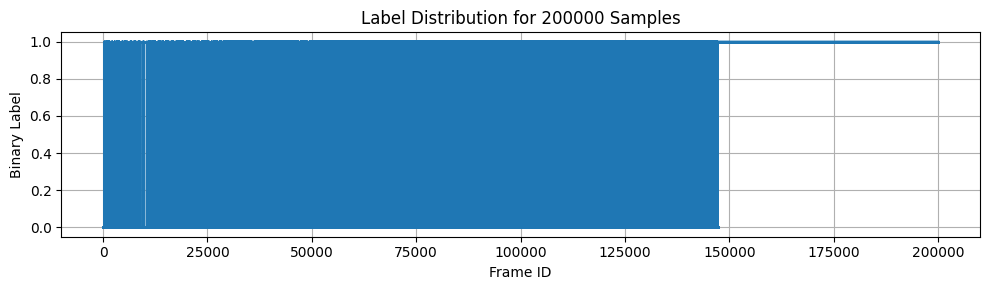

[WARNING] Too many misclassifications; skipping save.
Memory usage: 13.4%


In [ ]:
#import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")
#  Call only one at a time
process_veremi_sequence_safe(200000)
print(f"Memory usage: {psutil.virtual_memory().percent}%")

In [ ]:
import numpy as np
import pandas as pd
import os, time, psutil
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# === Global Result DataFrame ===
results_df = pd.DataFrame(columns=[
    'Timestamp', 'Model', 'Dataset', 'Sample Size', 'Training Time (s)', 'Best Epoch',
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Confusion Matrix',
    'CPU Usage (%)', 'Memory Usage (MB)', 'Model Size (MB)', 'Inference Time (s)'
])

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name, dataset_name, best_epoch, save_path=None):
    epochs = range(1, len(history.history['loss']) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Plot Loss
    axes[0].plot(epochs, history.history['loss'], label='Train Loss', color='steelblue')
    axes[0].plot(epochs, history.history['val_loss'], label='Val Loss', color='darkorange')
    axes[0].axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
    axes[0].set_title("Training vs Validation Loss")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Plot Accuracy
    axes[1].plot(epochs, history.history['accuracy'], label='Train Acc', color='steelblue')
    axes[1].plot(epochs, history.history['val_accuracy'], label='Val Acc', color='darkorange')
    axes[1].axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
    axes[1].set_title("Training vs Validation Accuracy")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    fig.suptitle(f"{model_name} - {dataset_name}", fontsize=14)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"* Plot saved to {save_path}")
    plt.show()


In [ ]:
# === Load Dataset ===
def load_data(size):
    global X_train, y_train, X_test, y_test, X_val, y_val, X, y
    X = np.load(f"/content/X_seq_{size}.npy")
    y = np.load(f"/content/y_seq_{size}.npy")

    n_total = len(X)
    n_train = int(0.90 * n_total)
    n_val = int(0.05 * n_total)
    n_test = n_total - n_train - n_val

    X_train, y_train = X[:n_train], y[:n_train]
    X_val, y_val = X[n_train:n_train + n_val], y[n_train:n_train + n_val]
    X_test, y_test = X[n_train + n_val:], y[n_train + n_val:]

# === Build Model ===
def build_rnn_model(model_type, input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=True))
        model.add(SimpleRNN(32, return_sequences=True))
        model.add(SimpleRNN(16))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True))
        model.add(LSTM(32, return_sequences=True))
        model.add(LSTM(16))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=True))
        model.add(GRU(32, return_sequences=True))
        model.add(GRU(16))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Train and Evaluate ===
def train_and_evaluate(model_type, size):
    print(f"\n * Training {model_type} on {size} samples...")
    model = build_rnn_model(model_type, input_shape=(X_train.shape[1], X_train.shape[2]))
    model_filename = f"{model_type}_best_model_{size}.keras"

    checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', save_best_only=True, verbose=1)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=30,
                        batch_size=64,
                        callbacks=[checkpoint, early_stop],
                        verbose=1)
    train_time = time.time() - start_time
    best_epoch = np.argmin(history.history['val_loss']) + 1

    model.load_weights(model_filename)

    start_inf = time.time()
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    inf_time = time.time() - start_inf

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1]).tolist()

    cpu = psutil.cpu_percent()
    mem = psutil.virtual_memory().used / (1024 ** 2)
    model_size = os.path.getsize(model_filename) / (1024 ** 2)

    plot_training_history(
        history,
        model_name=model_type,
        dataset_name=f"veremi_{size}",
        best_epoch=best_epoch,
        save_path=f"/content/{model_type}_veremi_{size}_history.png"
    )

    return {
        'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'Model': model_type,
        'Dataset': f"VeReMi_{size}",
        'Sample Size': len(X),
        'Training Time (s)': round(train_time, 3),
        'Best Epoch': best_epoch,
        'Accuracy': float(f"{acc:.6f}"),
        'Precision': float(f"{prec:.6f}"),
        'Recall': float(f"{rec:.6f}"),
        'F1 Score': float(f"{f1:.6f}"),
        'Confusion Matrix': cm,
        'CPU Usage (%)': cpu,
        'Memory Usage (MB)': round(mem, 2),
        'Model Size (MB)': round(model_size, 6),
        'Inference Time (s)': round(inf_time, 6)
    }



In [ ]:
# === Execute for One Dataset Size ===
'''
size = 20000
load_data(size)
for mtype in ['RNN', 'LSTM', 'GRU']:
    xresult = train_and_evaluate(mtype, size)
    results_df.loc[len(results_df)] = xresult


results_df.to_csv(f"/content/rnn_lstm_gru_results_{size}.csv", index=False)
results_df
'''

'\nsize = 20000\nload_data(size)\nfor mtype in [\'RNN\', \'LSTM\', \'GRU\']:\n    xresult = train_and_evaluate(mtype, size)\n    results_df.loc[len(results_df)] = xresult\n\n\nresults_df.to_csv(f"/content/rnn_lstm_gru_results_{size}.csv", index=False)\nresults_df\n'


 * Training RNN on 20000 samples...
Epoch 1/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7450 - loss: 0.5224
Epoch 1: val_loss improved from inf to 0.00997, saving model to RNN_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7452 - loss: 0.5222 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 2/30
269/282 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8358 - loss: 0.3646
Epoch 2: val_loss improved from 0.00997 to 0.00237, saving model to RNN_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8364 - loss: 0.3635 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 3/30
281/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8790 - loss: 0.2934
Epoch 3: val_loss improved from 0.00237 to 0.00088, saving model to RNN_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8791 - loss: 0.2933 - val_accuracy: 1.0000 - val_loss: 8.7705e-04
Epoch 4/30
271/282 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

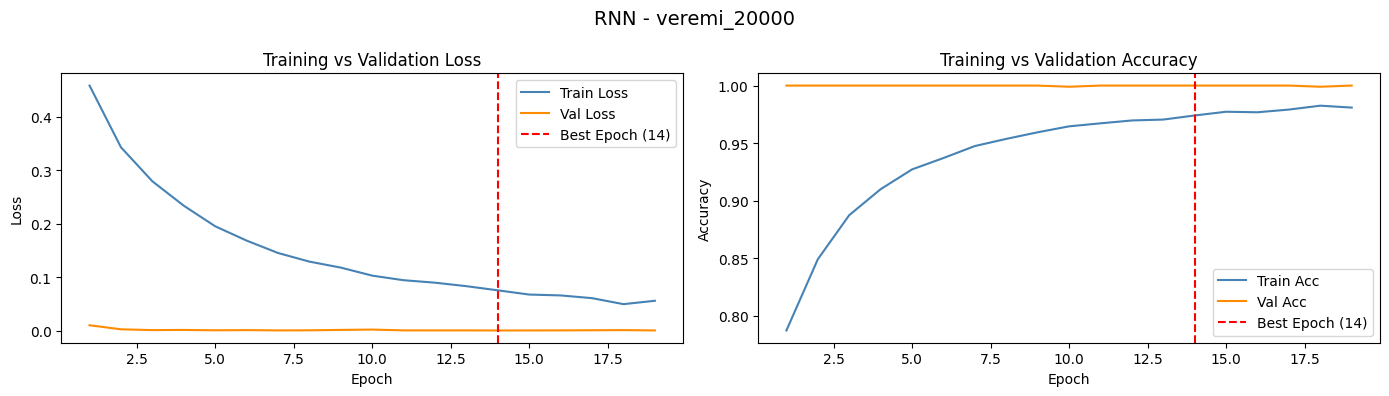


 * Training LSTM on 20000 samples...
Epoch 1/30
279/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7359 - loss: 0.5435
Epoch 1: val_loss improved from inf to 0.00098, saving model to LSTM_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7366 - loss: 0.5424 - val_accuracy: 1.0000 - val_loss: 9.8257e-04
Epoch 2/30
281/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8089 - loss: 0.3951
Epoch 2: val_loss improved from 0.00098 to 0.00022, saving model to LSTM_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8089 - loss: 0.3950 - val_accuracy: 1.0000 - val_loss: 2.2133e-04
Epoch 3/30
280/282 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8243 - loss: 0.3678
Epoch 3: val_loss improved from 0.00022 to 0.00011, saving model to LSTM_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8243 - loss: 0.3678 - val_accuracy: 1.0000 - val_loss: 1.1276e-04
Epoch 4/30
276/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

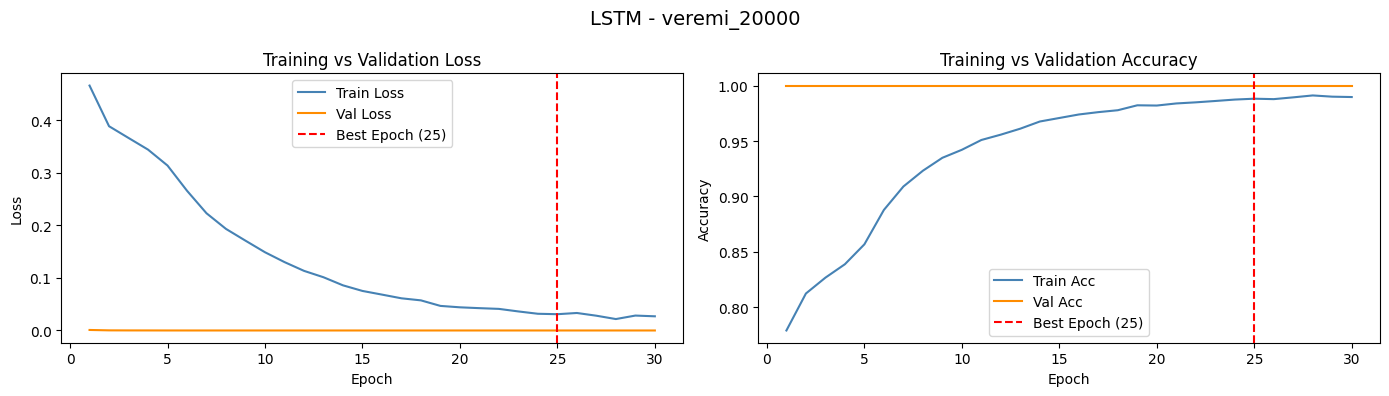


 * Training GRU on 20000 samples...
Epoch 1/30
281/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7680 - loss: 0.4979
Epoch 1: val_loss improved from inf to 0.00105, saving model to GRU_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7682 - loss: 0.4975 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/30
280/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8196 - loss: 0.3949
Epoch 2: val_loss improved from 0.00105 to 0.00020, saving model to GRU_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8197 - loss: 0.3947 - val_accuracy: 1.0000 - val_loss: 2.0292e-04
Epoch 3/30
279/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8517 - loss: 0.3352
Epoch 3: val_loss improved from 0.00020 to 0.00009, saving model to GRU_best_model_20000.keras
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8518 - loss: 0.3351 - val_accuracy: 1.0000 - val_loss: 9.0739e-05
Epoch 4/30
278/282 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 

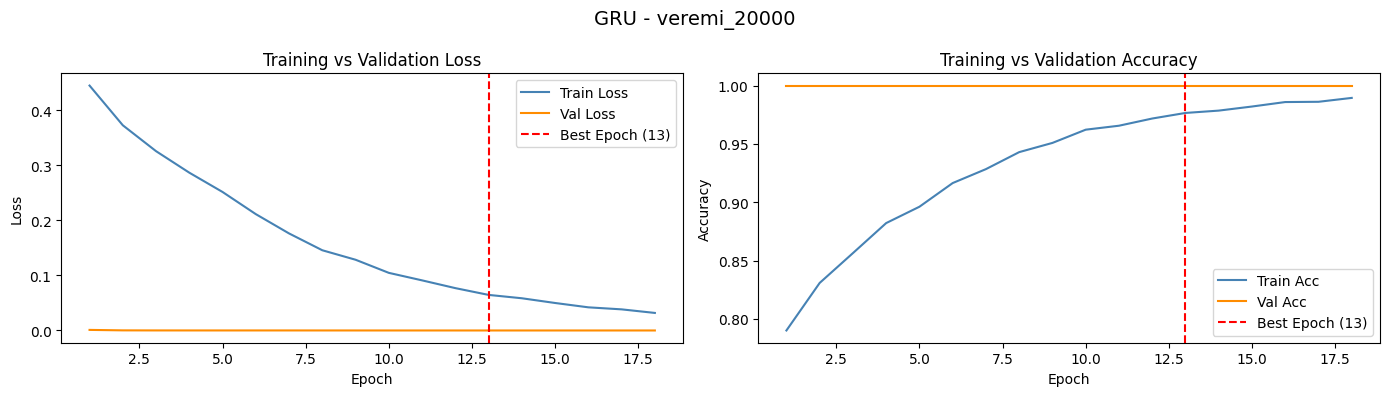


 * Training RNN on 40000 samples...
Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7505 - loss: 0.5170
Epoch 1: val_loss improved from inf to 0.01809, saving model to RNN_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - accuracy: 0.7506 - loss: 0.5169 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 2/30
561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8428 - loss: 0.3568
Epoch 2: val_loss improved from 0.01809 to 0.00364, saving model to RNN_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8428 - loss: 0.3567 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 3/30
556/563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8899 - loss: 0.2751
Epoch 3: val_loss did not improve from 0.00364
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8900 - loss: 0.2749 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 4/30
557/563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9134 - loss: 0.2171
Epoch 4: val_loss improved from 0

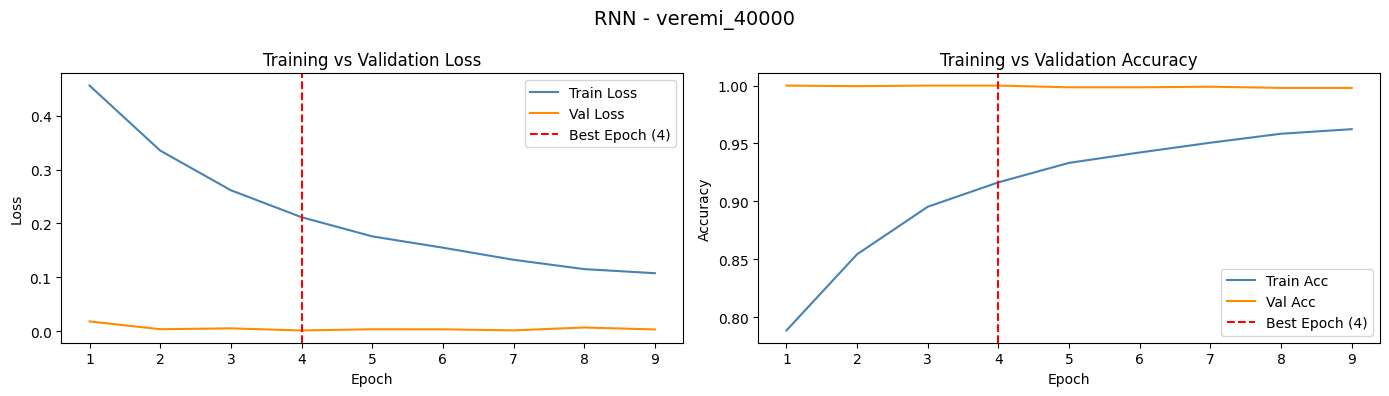


 * Training LSTM on 40000 samples...
Epoch 1/30
561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7145 - loss: 0.5521
Epoch 1: val_loss improved from inf to 0.00018, saving model to LSTM_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7148 - loss: 0.5517 - val_accuracy: 1.0000 - val_loss: 1.7745e-04
Epoch 2/30
558/563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7994 - loss: 0.4199
Epoch 2: val_loss improved from 0.00018 to 0.00009, saving model to LSTM_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7994 - loss: 0.4199 - val_accuracy: 1.0000 - val_loss: 8.5709e-05
Epoch 3/30
561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8254 - loss: 0.3828
Epoch 3: val_loss improved from 0.00009 to 0.00000, saving model to LSTM_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8254 - loss: 0.3827 - val_accuracy: 1.0000 - val_loss: 1.2759e-06
Epoch 4/30
558/563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - 

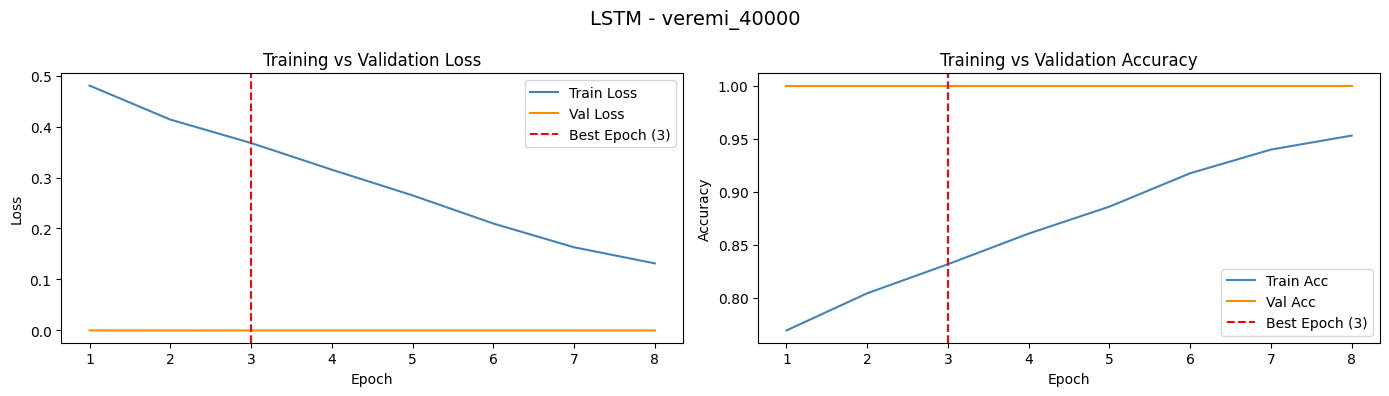


 * Training GRU on 40000 samples...
Epoch 1/30
561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7431 - loss: 0.5234
Epoch 1: val_loss improved from inf to 0.00118, saving model to GRU_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7433 - loss: 0.5231 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/30
560/563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8266 - loss: 0.3781
Epoch 2: val_loss improved from 0.00118 to 0.00021, saving model to GRU_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8266 - loss: 0.3780 - val_accuracy: 1.0000 - val_loss: 2.1043e-04
Epoch 3/30
559/563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8478 - loss: 0.3277
Epoch 3: val_loss improved from 0.00021 to 0.00009, saving model to GRU_best_model_40000.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8479 - loss: 0.3276 - val_accuracy: 1.0000 - val_loss: 8.7219e-05
Epoch 4/30
556/563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 

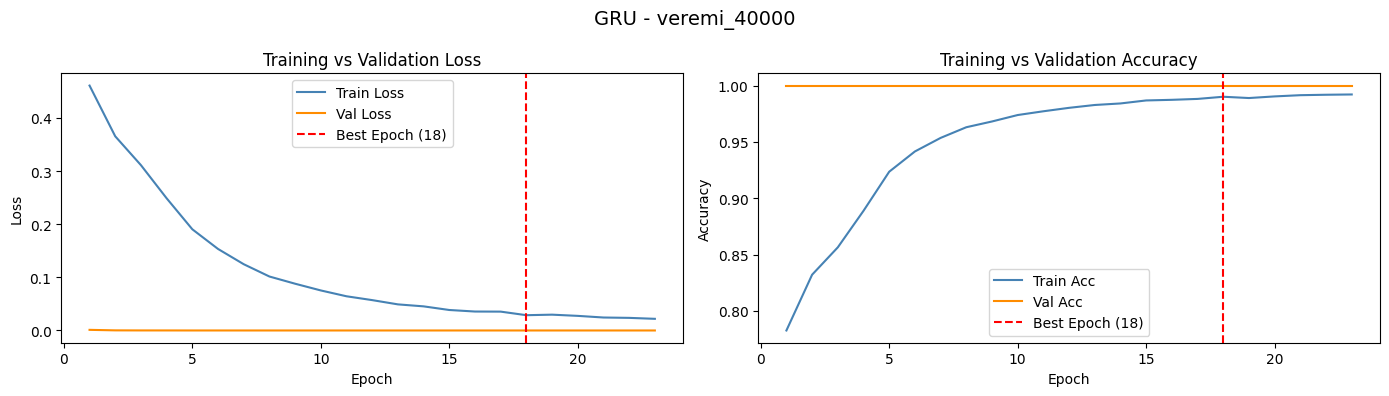


 * Training RNN on 80000 samples...
Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7281 - loss: 0.5422
Epoch 1: val_loss improved from inf to 0.00245, saving model to RNN_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7281 - loss: 0.5422 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 2/30
1122/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4366
Epoch 2: val_loss improved from 0.00245 to 0.00132, saving model to RNN_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7972 - loss: 0.4366 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 3/30
1111/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8279 - loss: 0.3812
Epoch 3: val_loss improved from 0.00132 to 0.00105, saving model to RNN_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8280 - loss: 0.3810 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 4/30
1123/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

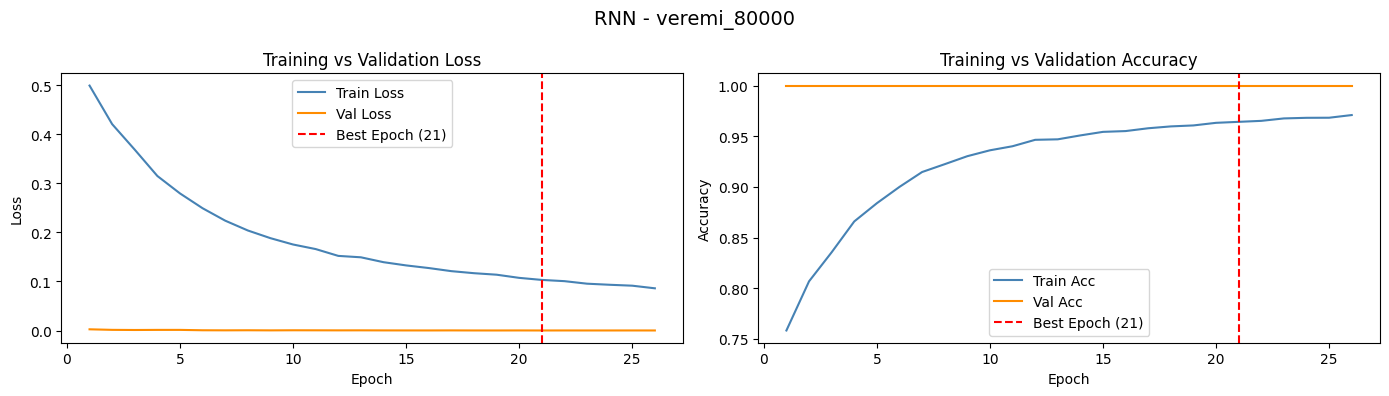


 * Training LSTM on 80000 samples...
Epoch 1/30
1119/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7230 - loss: 0.5466
Epoch 1: val_loss improved from inf to 0.00009, saving model to LSTM_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7232 - loss: 0.5463 - val_accuracy: 1.0000 - val_loss: 8.5605e-05
Epoch 2/30
1124/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8077 - loss: 0.4126
Epoch 2: val_loss improved from 0.00009 to 0.00001, saving model to LSTM_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8077 - loss: 0.4125 - val_accuracy: 1.0000 - val_loss: 1.0279e-05
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8633 - loss: 0.3192
Epoch 3: val_loss improved from 0.00001 to 0.00000, saving model to LSTM_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8633 - loss: 0.3192 - val_accuracy: 1.0000 - val_loss: 2.1166e-06
Epoch 4/30
1120/1125 ━━━━━━━━━━━━━━━━━━━━ 0

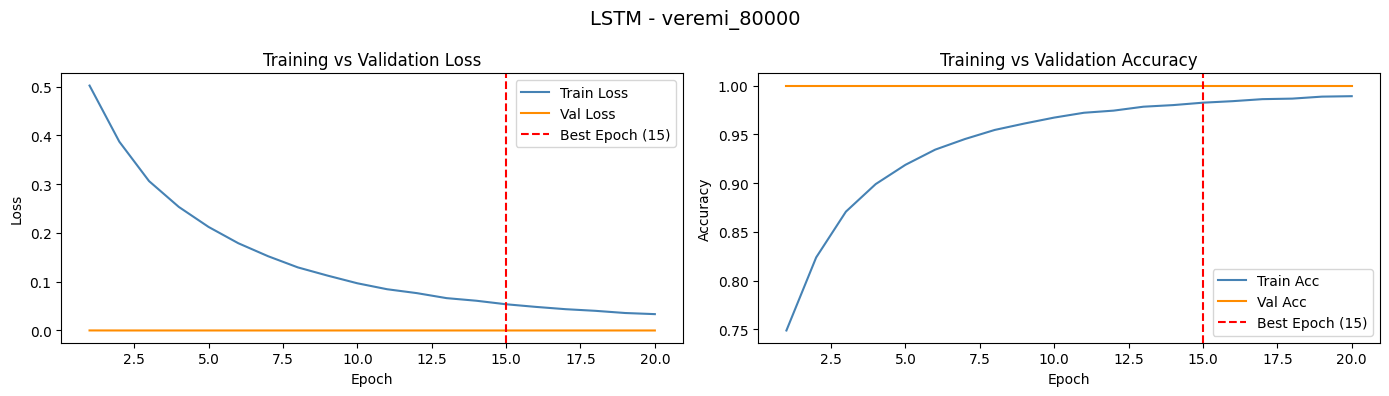


 * Training GRU on 80000 samples...
Epoch 1/30
1119/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7330 - loss: 0.5232
Epoch 1: val_loss improved from inf to 0.00006, saving model to GRU_best_model_80000.keras
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7333 - loss: 0.5228 - val_accuracy: 1.0000 - val_loss: 5.6574e-05
Epoch 2/30
1123/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8135 - loss: 0.4091
Epoch 2: val_loss did not improve from 0.00006
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8135 - loss: 0.4091 - val_accuracy: 1.0000 - val_loss: 1.7301e-04
Epoch 3/30
1122/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8497 - loss: 0.3465
Epoch 3: val_loss did not improve from 0.00006
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8497 - loss: 0.3465 - val_accuracy: 1.0000 - val_loss: 8.6475e-05
Epoch 4/30
1122/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8821 - loss: 0.2842
Epoch 4: val_loss improved from 0.00006 to 0.00005, sav

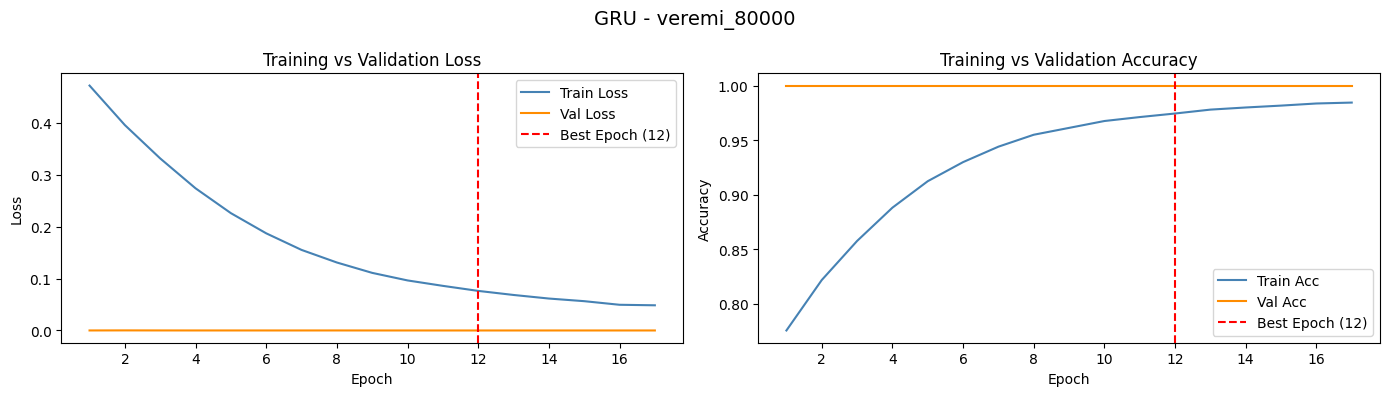


 * Training RNN on 120000 samples...
Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7400 - loss: 0.5246
Epoch 1: val_loss improved from inf to 0.00112, saving model to RNN_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7401 - loss: 0.5246 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/30
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8087 - loss: 0.4209
Epoch 2: val_loss improved from 0.00112 to 0.00045, saving model to RNN_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8087 - loss: 0.4208 - val_accuracy: 1.0000 - val_loss: 4.4801e-04
Epoch 3/30
1684/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8209 - loss: 0.3919
Epoch 3: val_loss improved from 0.00045 to 0.00034, saving model to RNN_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8209 - loss: 0.3919 - val_accuracy: 1.0000 - val_loss: 3.3511e-04
Epoch 4/30
1680/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

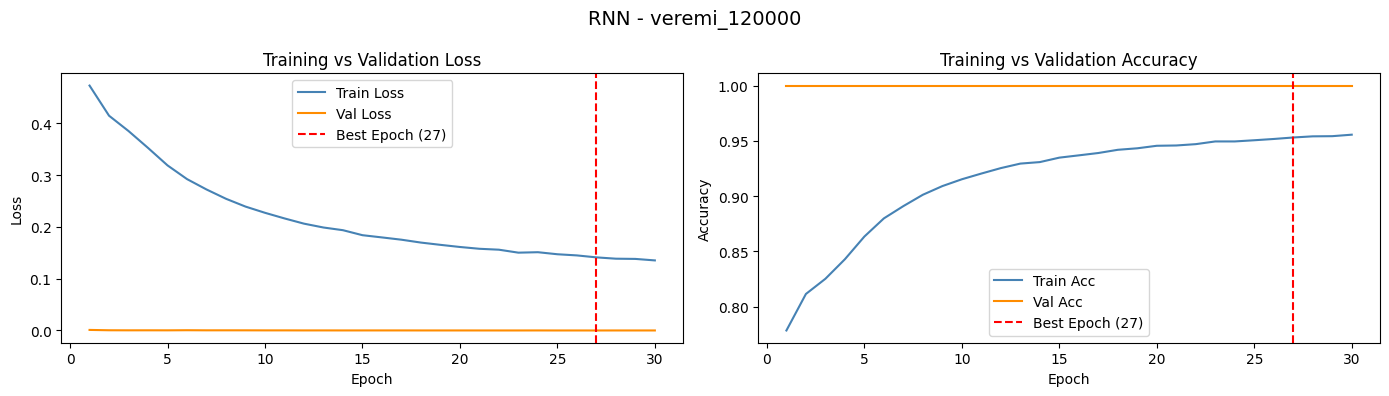


 * Training LSTM on 120000 samples...
Epoch 1/30
1685/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7382 - loss: 0.5236
Epoch 1: val_loss improved from inf to 0.00000, saving model to LSTM_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7382 - loss: 0.5235 - val_accuracy: 1.0000 - val_loss: 2.4435e-06
Epoch 2/30
1685/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8187 - loss: 0.4049
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to LSTM_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8187 - loss: 0.4049 - val_accuracy: 1.0000 - val_loss: 1.9786e-06
Epoch 3/30
1684/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8485 - loss: 0.3507
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to LSTM_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8485 - loss: 0.3506 - val_accuracy: 1.0000 - val_loss: 1.9610e-07
Epoch 4/30
1686/1688 ━━━━━━━━━━━━━━━━━

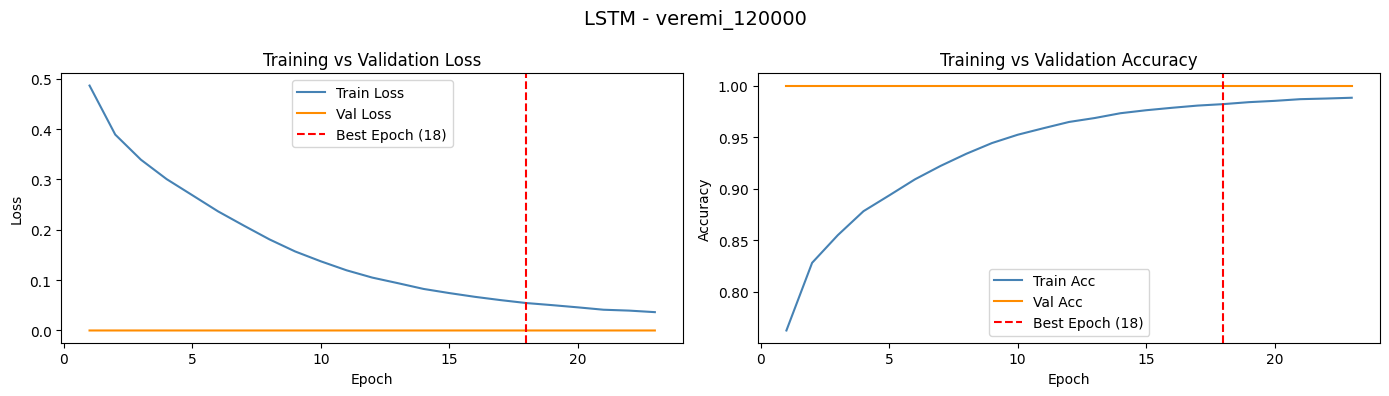


 * Training GRU on 120000 samples...
Epoch 1/30
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7608 - loss: 0.4985
Epoch 1: val_loss improved from inf to 0.00003, saving model to GRU_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7608 - loss: 0.4985 - val_accuracy: 1.0000 - val_loss: 3.0075e-05
Epoch 2/30
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8241 - loss: 0.3907
Epoch 2: val_loss improved from 0.00003 to 0.00001, saving model to GRU_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8242 - loss: 0.3906 - val_accuracy: 1.0000 - val_loss: 1.2496e-05
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8458 - loss: 0.3431
Epoch 3: val_loss improved from 0.00001 to 0.00001, saving model to GRU_best_model_120000.keras
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8458 - loss: 0.3431 - val_accuracy: 1.0000 - val_loss: 8.6584e-06
Epoch 4/30
1684/1688 ━━━━━━━━━━━━━━━━━━━━ 

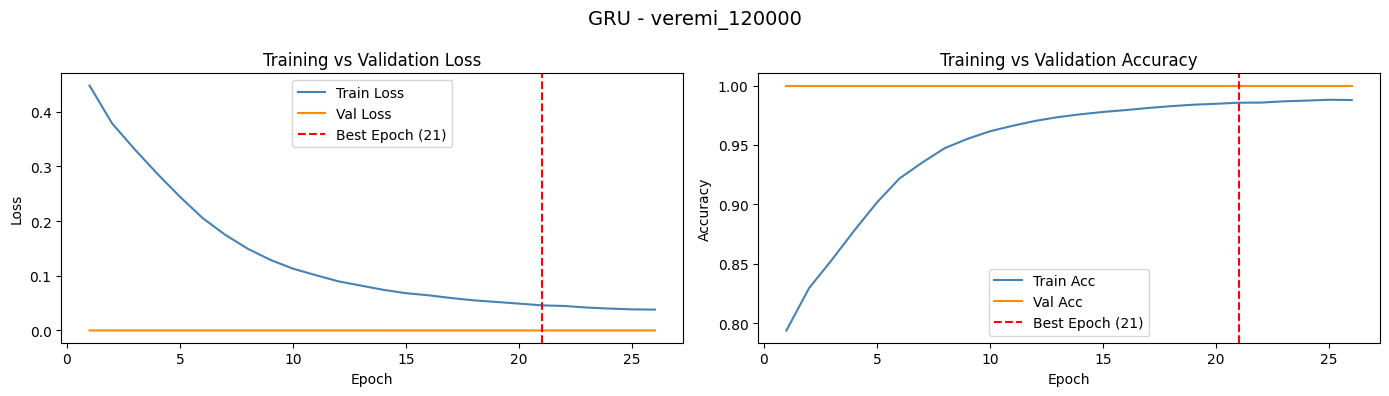


 * Training RNN on 160000 samples...
Epoch 1/30
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7273 - loss: 0.5392
Epoch 1: val_loss improved from inf to 0.00133, saving model to RNN_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7273 - loss: 0.5392 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/30
2247/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4364
Epoch 2: val_loss improved from 0.00133 to 0.00070, saving model to RNN_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7997 - loss: 0.4364 - val_accuracy: 1.0000 - val_loss: 6.9513e-04
Epoch 3/30
2249/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8102 - loss: 0.4131
Epoch 3: val_loss improved from 0.00070 to 0.00024, saving model to RNN_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8102 - loss: 0.4130 - val_accuracy: 1.0000 - val_loss: 2.3831e-04
Epoch 4/30
2237/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 4

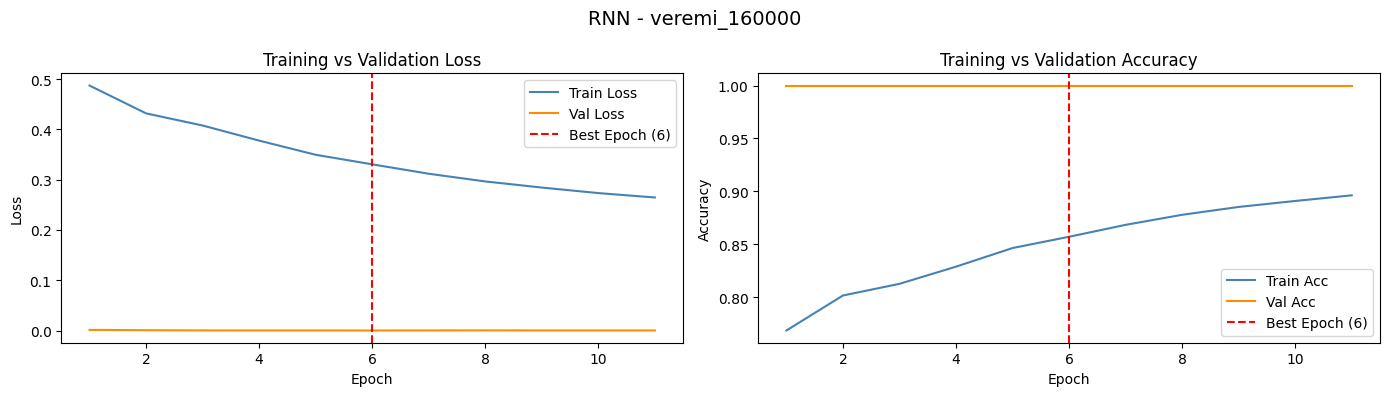


 * Training LSTM on 160000 samples...
Epoch 1/30
2244/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7290 - loss: 0.5312
Epoch 1: val_loss improved from inf to 0.00001, saving model to LSTM_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7292 - loss: 0.5310 - val_accuracy: 1.0000 - val_loss: 5.8883e-06
Epoch 2/30
2246/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8193 - loss: 0.4066
Epoch 2: val_loss improved from 0.00001 to 0.00000, saving model to LSTM_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8193 - loss: 0.4066 - val_accuracy: 1.0000 - val_loss: 1.7176e-06
Epoch 3/30
2248/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8435 - loss: 0.3608
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to LSTM_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8435 - loss: 0.3608 - val_accuracy: 1.0000 - val_loss: 2.4269e-07
Epoch 4/30
2245/2250 ━━━━━━━━━━━━━━━━━

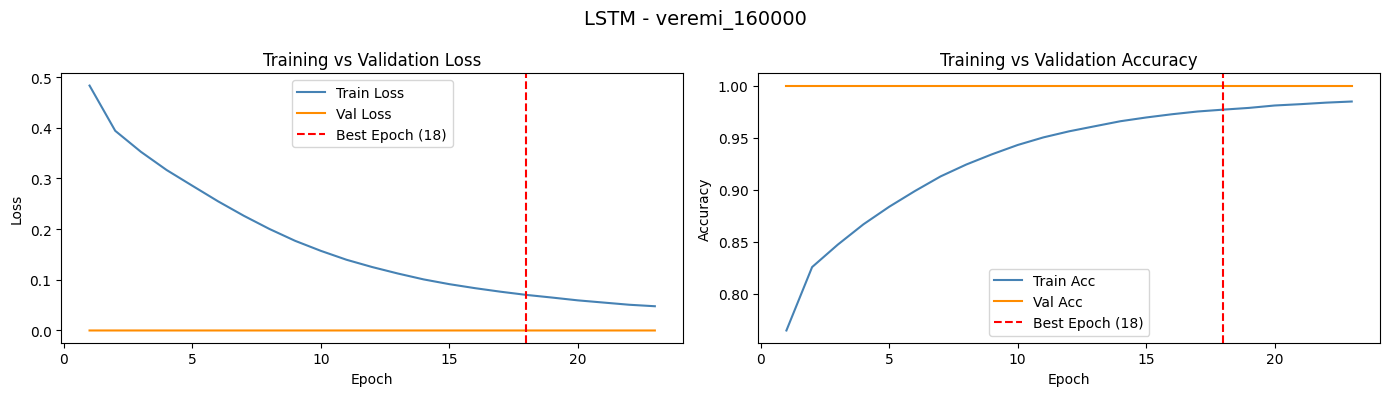


 * Training GRU on 160000 samples...
Epoch 1/30
2244/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7528 - loss: 0.5059
Epoch 1: val_loss improved from inf to 0.00004, saving model to GRU_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7529 - loss: 0.5057 - val_accuracy: 1.0000 - val_loss: 3.6515e-05
Epoch 2/30
2248/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8163 - loss: 0.4007
Epoch 2: val_loss improved from 0.00004 to 0.00002, saving model to GRU_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8163 - loss: 0.4007 - val_accuracy: 1.0000 - val_loss: 2.3307e-05
Epoch 3/30
2248/2250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8382 - loss: 0.3569
Epoch 3: val_loss improved from 0.00002 to 0.00001, saving model to GRU_best_model_160000.keras
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8382 - loss: 0.3569 - val_accuracy: 1.0000 - val_loss: 1.2249e-05
Epoch 4/30
2246/2250 ━━━━━━━━━━━━━━━━━━━━ 

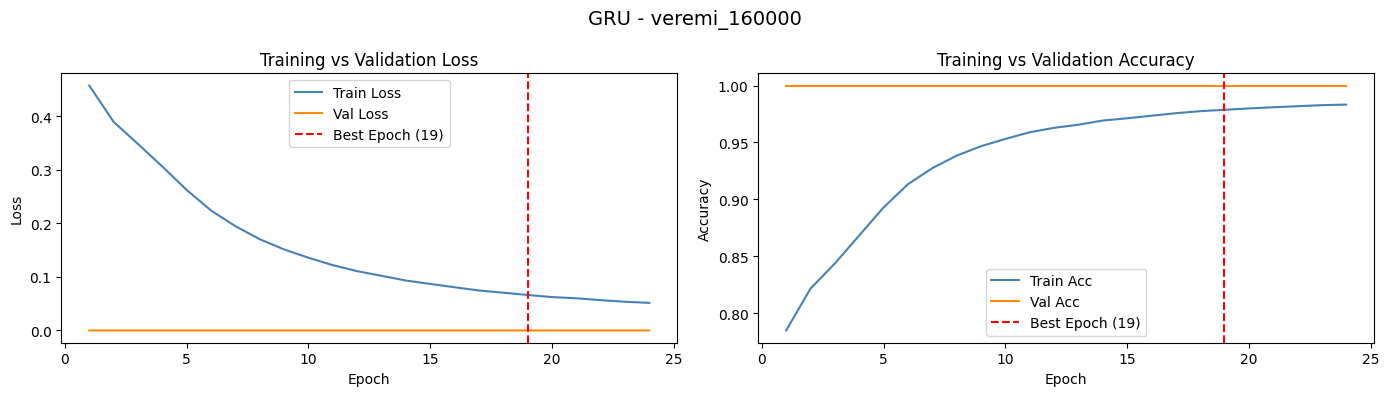


 * Training RNN on 200000 samples...
Epoch 1/30
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7353 - loss: 0.5340
Epoch 1: val_loss improved from inf to 0.00122, saving model to RNN_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7353 - loss: 0.5340 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/30
2805/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.4376
Epoch 2: val_loss improved from 0.00122 to 0.00089, saving model to RNN_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8004 - loss: 0.4376 - val_accuracy: 1.0000 - val_loss: 8.9142e-04
Epoch 3/30
2812/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.4185
Epoch 3: val_loss improved from 0.00089 to 0.00046, saving model to RNN_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8078 - loss: 0.4185 - val_accuracy: 1.0000 - val_loss: 4.6013e-04
Epoch 4/30
2807/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 4

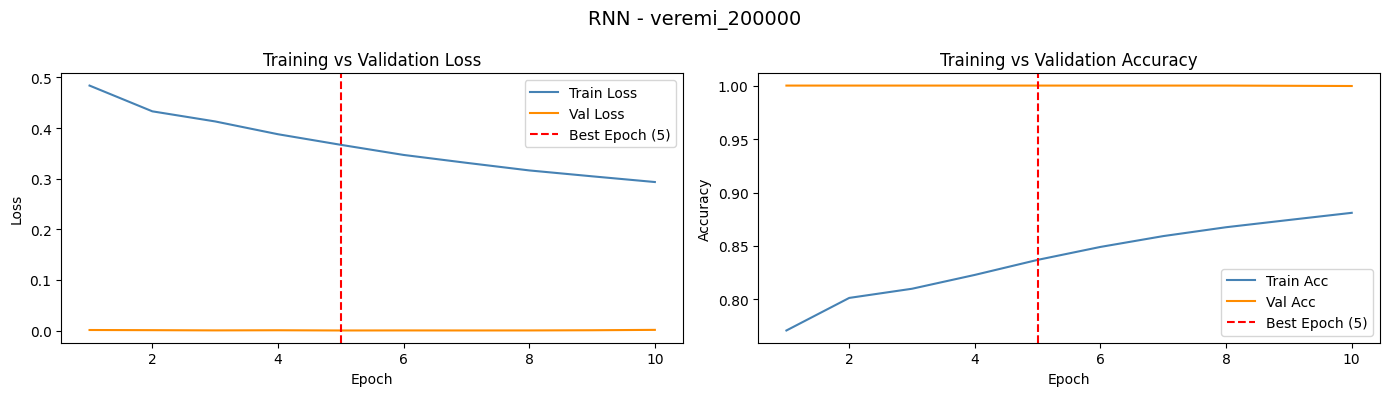


 * Training LSTM on 200000 samples...
Epoch 1/30
2807/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7352 - loss: 0.5225
Epoch 1: val_loss improved from inf to 0.00000, saving model to LSTM_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.7353 - loss: 0.5224 - val_accuracy: 1.0000 - val_loss: 2.9558e-07
Epoch 2/30
2810/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8188 - loss: 0.4090
Epoch 2: val_loss did not improve from 0.00000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8188 - loss: 0.4089 - val_accuracy: 1.0000 - val_loss: 2.1570e-06
Epoch 3/30
2810/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8343 - loss: 0.3794
Epoch 3: val_loss did not improve from 0.00000
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8343 - loss: 0.3794 - val_accuracy: 1.0000 - val_loss: 8.5367e-07
Epoch 4/30
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8472 - loss: 0.3527
Epoch 4: val_loss did not improve from 0.00000
281

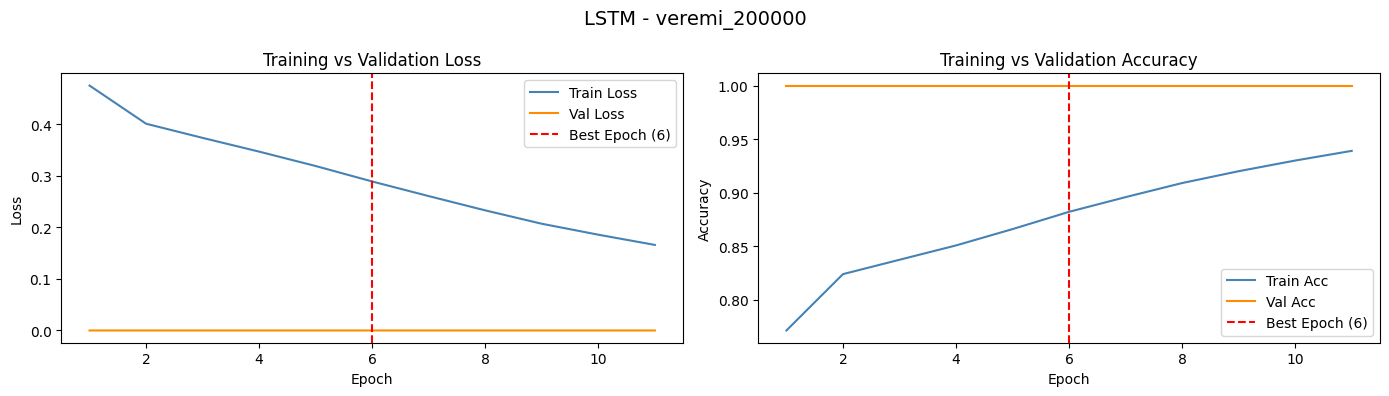


 * Training GRU on 200000 samples...
Epoch 1/30
2812/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7588 - loss: 0.4943
Epoch 1: val_loss improved from inf to 0.00002, saving model to GRU_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.7589 - loss: 0.4942 - val_accuracy: 1.0000 - val_loss: 1.7202e-05
Epoch 2/30
2810/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8184 - loss: 0.4042
Epoch 2: val_loss improved from 0.00002 to 0.00000, saving model to GRU_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.8184 - loss: 0.4042 - val_accuracy: 1.0000 - val_loss: 4.1611e-06
Epoch 3/30
2810/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8353 - loss: 0.3732
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to GRU_best_model_200000.keras
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8353 - loss: 0.3732 - val_accuracy: 1.0000 - val_loss: 2.6752e-06
Epoch 4/30
2810/2813 ━━━━━━━━━━━━━━━━━━━━ 

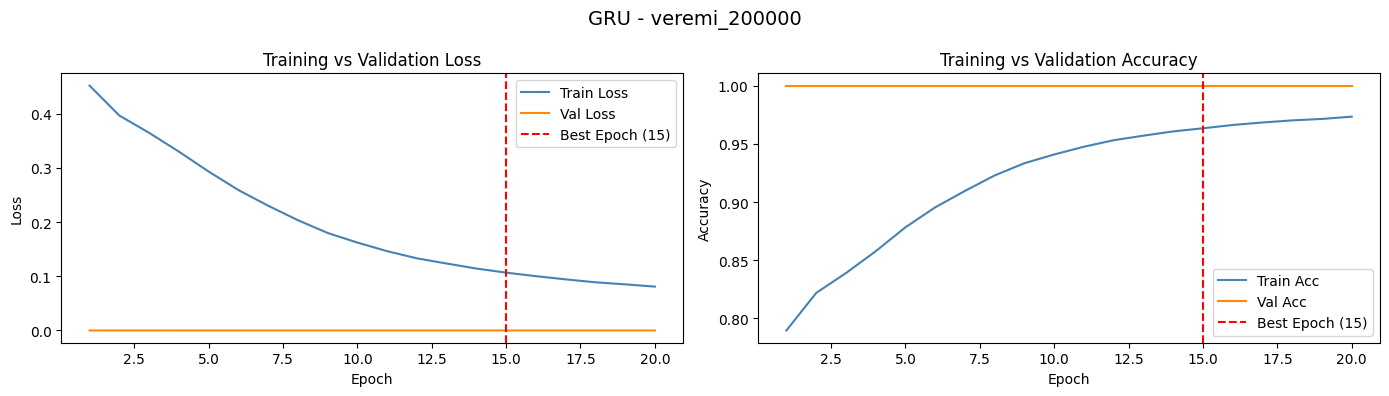

,Timestamp,Model,Dataset,Sample Size,Training Time (s),Best Epoch,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,CPU Usage (%),Memory Usage (MB),Model Size (MB),Inference Time (s)
0,2025-06-19 10:01:11,RNN,VeReMi_20000,19995,39.588773,14,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 1001]]",29.500000,2193.917969,0.150729,2.591350
1,2025-06-19 10:02:41,LSTM,VeReMi_20000,19995,87.556505,25,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 1001]]",64.200000,2243.285156,0.455689,1.330551
2,2025-06-19 10:03:30,GRU,VeReMi_20000,19995,47.968479,13,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 1001]]",69.100000,2305.203125,0.357894,0.502278
3,2025-06-19 10:04:56,RNN,VeReMi_40000,39995,81.794243,4,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 2001]]",34.000000,2340.964844,0.150732,2.592725
4,2025-06-19 10:05:47,LSTM,VeReMi_40000,39995,49.302824,3,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 2001]]",67.800000,2374.167969,0.455694,0.672911
5,2025-06-19 10:08:09,GRU,VeReMi_40000,39995,139.174952,18,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 2001]]",64.400000,2454.203125,0.357896,1.328079
6,2025-06-19 10:10:49,RNN,VeReMi_80000,79995,156.621846,21,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 4001]]",60.500000,2604.937500,0.150732,2.611509
7,2025-06-19 10:14:46,LSTM,VeReMi_80000,79995,235.651835,15,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 4001]]",69.300000,2680.625000,0.455695,0.845824
8,2025-06-19 10:17:40,GRU,VeReMi_80000,79995,172.138664,12,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 4001]]",75.300000,2649.972656,0.357897,0.740532
9,2025-06-19 10:22:01,RNN,VeReMi_120000,119995,256.626510,27,1.000000,1.000000,1.000000,1.000000,"[[0, 0], [0, 6001]]",63.900000,2795.406250,0.150732,2.602639


In [ ]:
subset_sizes = [20000, 40000, 80000, 120000, 160000, 200000]

pd.set_option('display.float_format', lambda x: '%.6f' % x)


for size in subset_sizes:
    load_data(size)
    for mtype in ['RNN', 'LSTM', 'GRU']:
        xresult = train_and_evaluate(mtype, size)
        results_df.loc[len(results_df)] = xresult
        results_df.to_csv(f"/content/results_{size}_{mtype}.csv", index=False)
        # Save CSV to Drive
        results_df.to_csv(f"{drive_path}/results_{size}_{mtype}.csv", index=False)

results_df.to_csv(f"/content/rnn_lstm_gru_results_{size}.csv", index=False)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

results_df

In [ ]:
'''
subset_sizes = [160000, 200000]

for size in subset_sizes:
    load_data(size)
    for mtype in ['RNN', 'LSTM', 'GRU']:
        xresult = train_and_evaluate(mtype, size)
        results_df.loc[len(results_df)] = xresult
        print(results_df.values.tolist())
        results_df.to_csv(f"/content/results_{size}_{mtype}.csv", index=False)
         # Save CSV to Drive
        results_df.to_csv(f"{drive_path}/results_{size}_{mtype}.csv", index=False)

results_df.to_csv(f"/content/rnn_lstm_gru_results_{size}.csv", index=False)
results_df
'''

In [ ]:
import os
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import glob

# Ensure the output directory exists
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# Define the PDF output path
pdf_path = os.path.join(output_dir, "all_model_training_plots.pdf")
image_files = sorted(glob.glob(os.path.join(output_dir, "*_history.png")))

# Combine plots into a single PDF
with PdfPages(pdf_path) as pdf:
    for image_file in image_files:
        img = plt.imread(image_file)
        plt.figure(figsize=(14, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(image_file))
        pdf.savefig()
        plt.close()

print(f"* Combined PDF saved at: {pdf_path}")


* Combined PDF saved at: /content/all_model_training_plots.pdf


In [ ]:
from datetime import datetime

# Get current date and time
current_datetime = datetime.now()
print(current_datetime)

2025-06-19 11:20:56.400188
